In [3]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


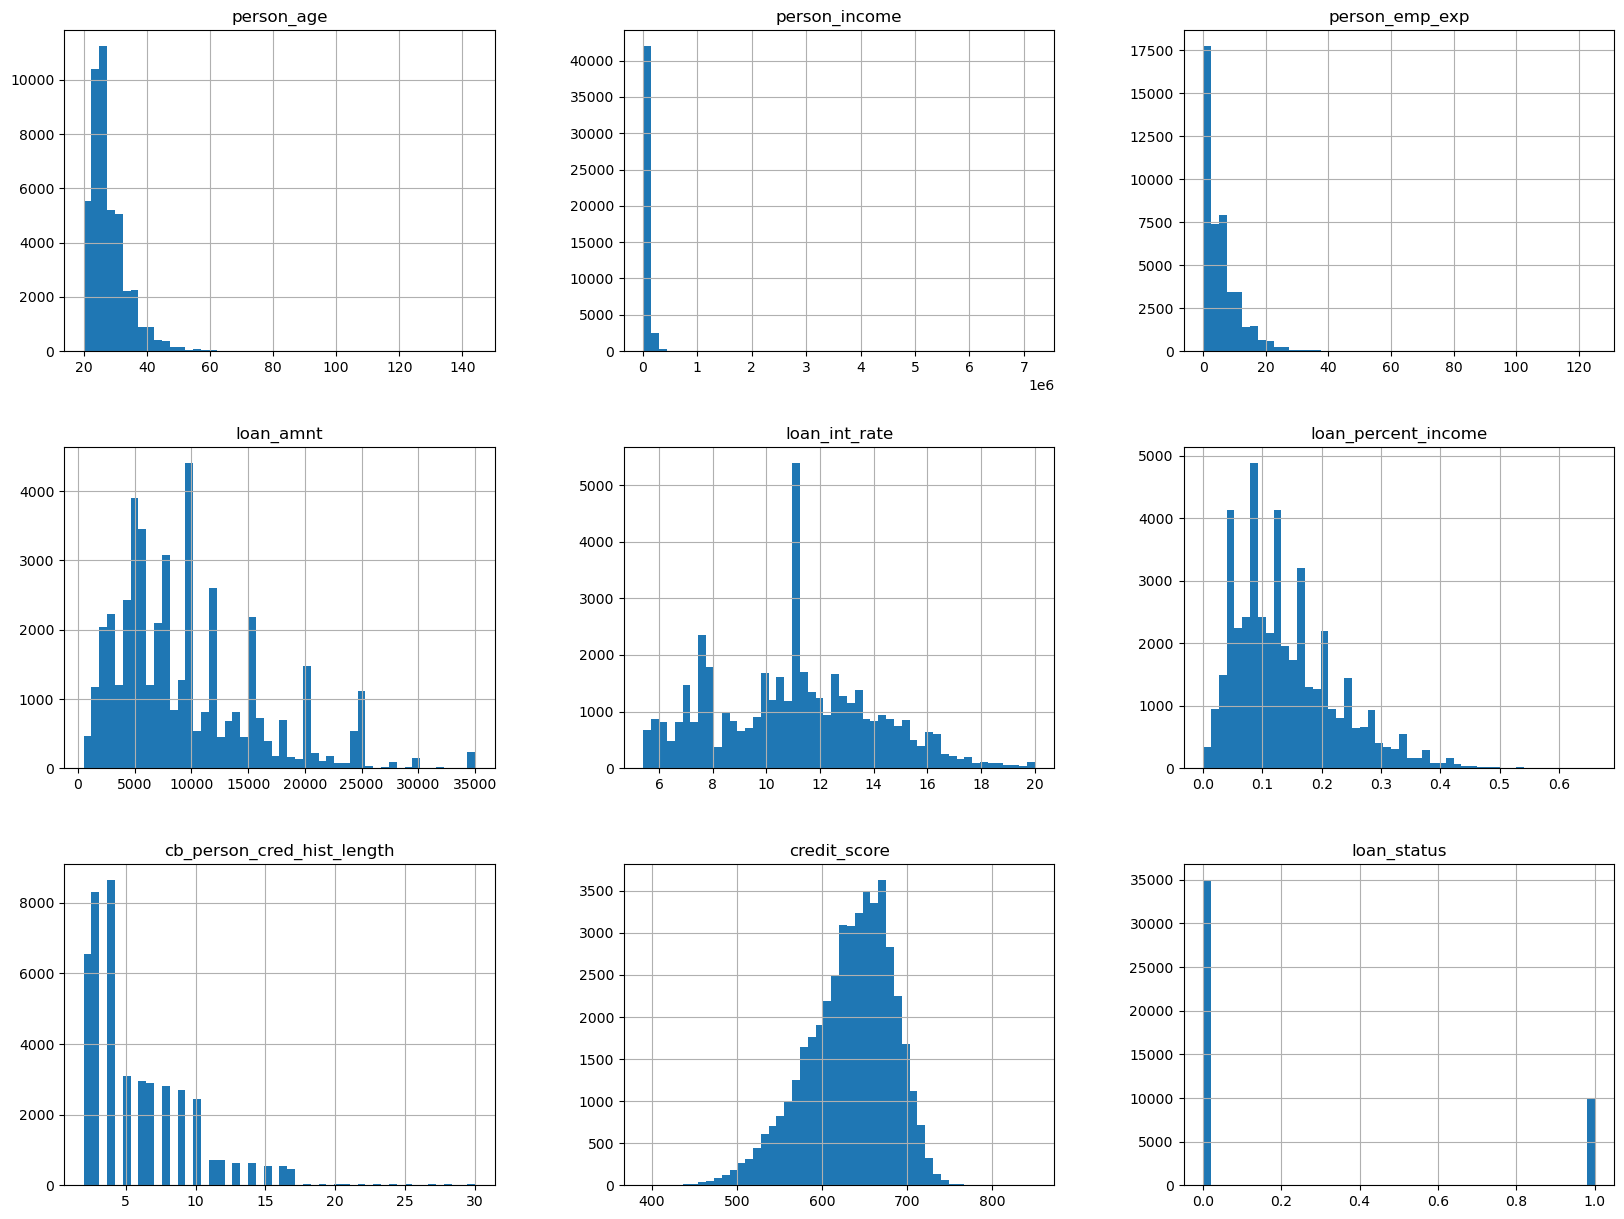

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [35]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# This if for splitting the data
train_set, test_set = train_test_split(df, test_size=0.2)

# stratified sampling on the target
stratified_shuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in stratified_shuffle.split(df, df["loan_status"]):
    strat_train_test = df.loc[train_index]
    strat_test_index = df.loc[test_index]

In [44]:
loan_status = strat_train_test.copy()

array([[<Axes: xlabel='person_age', ylabel='person_age'>,
        <Axes: xlabel='person_income', ylabel='person_age'>,
        <Axes: xlabel='loan_percent_income', ylabel='person_age'>,
        <Axes: xlabel='credit_score', ylabel='person_age'>,
        <Axes: xlabel='person_emp_exp', ylabel='person_age'>,
        <Axes: xlabel='loan_amnt', ylabel='person_age'>],
       [<Axes: xlabel='person_age', ylabel='person_income'>,
        <Axes: xlabel='person_income', ylabel='person_income'>,
        <Axes: xlabel='loan_percent_income', ylabel='person_income'>,
        <Axes: xlabel='credit_score', ylabel='person_income'>,
        <Axes: xlabel='person_emp_exp', ylabel='person_income'>,
        <Axes: xlabel='loan_amnt', ylabel='person_income'>],
       [<Axes: xlabel='person_age', ylabel='loan_percent_income'>,
        <Axes: xlabel='person_income', ylabel='loan_percent_income'>,
        <Axes: xlabel='loan_percent_income', ylabel='loan_percent_income'>,
        <Axes: xlabel='credit_score',

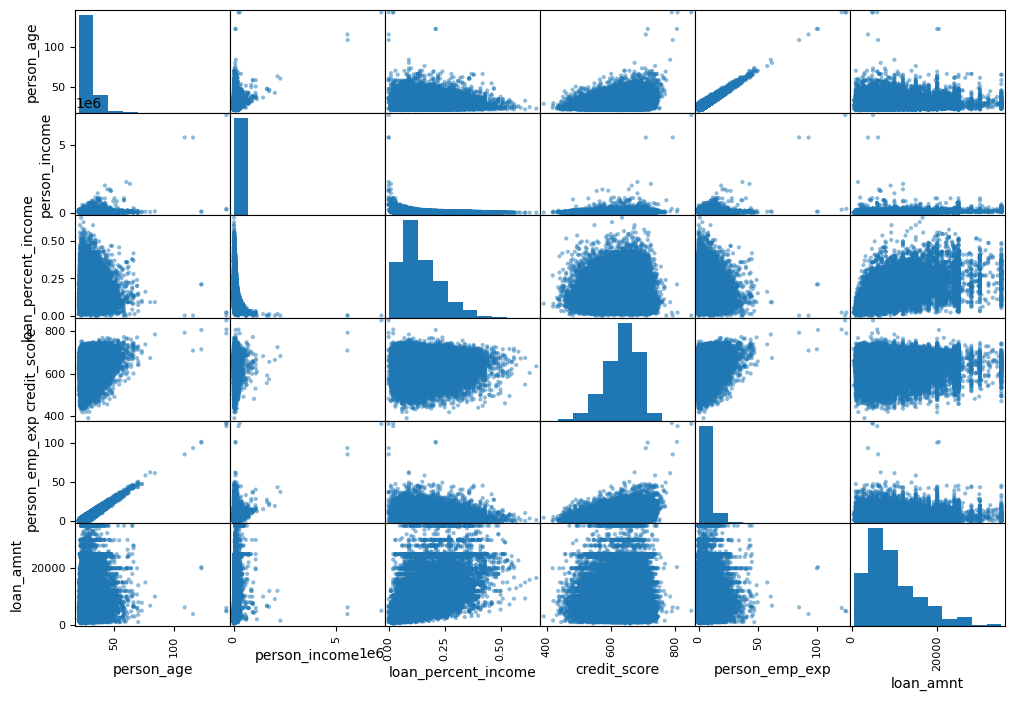

In [49]:
from pandas.plotting import scatter_matrix

attributes = [
    "person_age", 
    "person_income", 
    "loan_percent_income", 
    "credit_score", 
    "person_emp_exp", 
    "loan_amnt"
]
scatter_matrix(loan_status[attributes], figsize=(12, 8))

In [53]:
df["loan_intent"].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64